In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
np.random.seed(42)
#Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [3]:
#creating datapoints in the form of a circle
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

#Adding datapoints to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\Prince\AppData\Local\Temp\ipykernel_9712\48097224.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(300,700))
C:\Users\Prince\AppData\Local\Temp\ipykernel_9712\48097224.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(100,300))
C:\Users\Prince\AppData\Local\Temp\ipykernel_9712\48097224.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [4]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


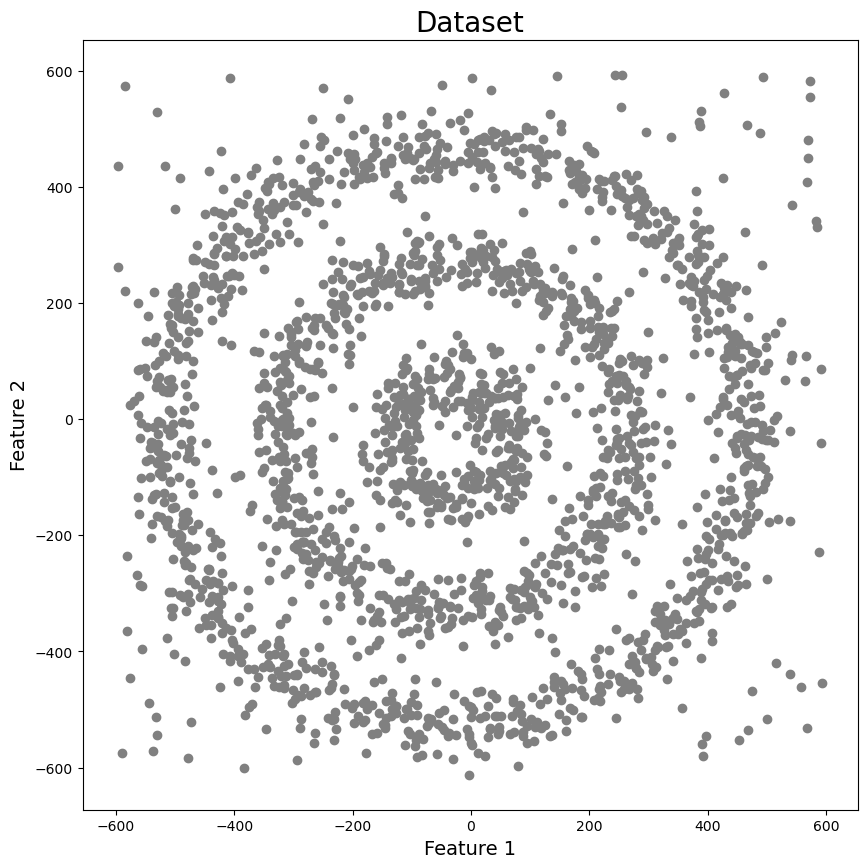

In [5]:
#plotting the datapoints
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [7]:
#Lets first check with KMeans clustering algorithm and Hierarchical clustering
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4,random_state=42,n_init='auto')
k_means.fit(df)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [8]:
df['KMeans_Labels'] = k_means.labels_

In [9]:
df.head()

,0,1,KMeans_Labels
0,484.891555,-31.006357,0
1,489.391178,21.973916,1
2,462.886575,-27.599889,0
3,517.218479,5.588090,1
4,455.669049,1.982181,1


In [14]:
df['KMeans_Labels'].value_counts()

2    594
3    593
0    569
1    544
Name: KMeans_Labels, dtype: int64

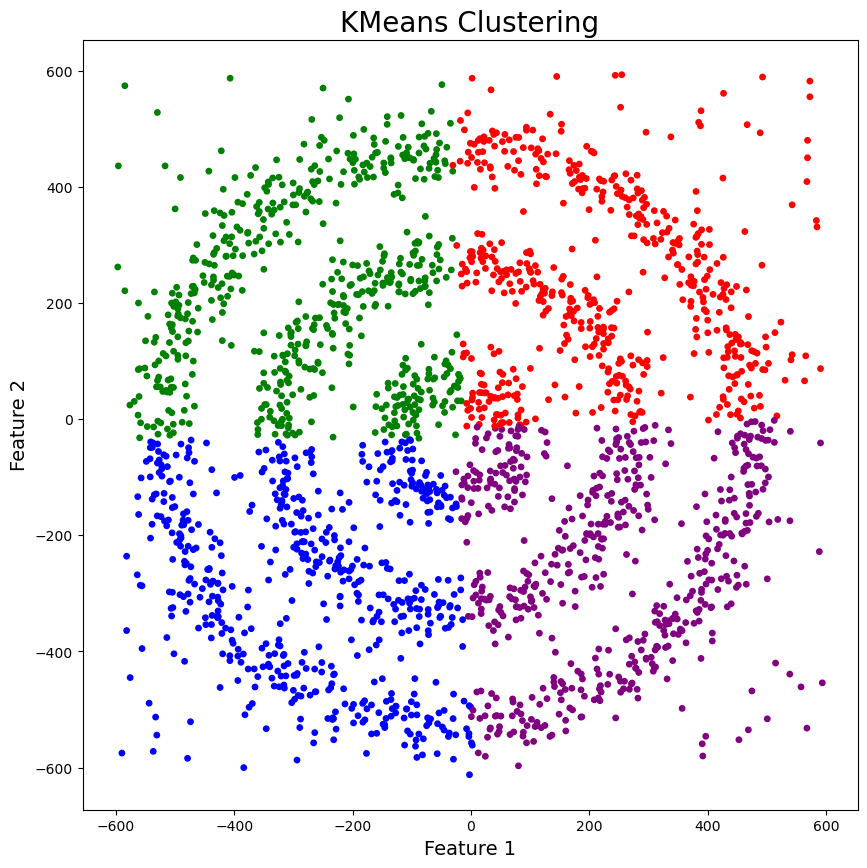

In [26]:
#Plotting the resulting clusters from KMeans
colors =['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c = df['KMeans_Labels'],cmap =matplotlib.colors.ListedColormap(colors) ,s=15)
plt.title('KMeans Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [29]:
df.columns

Index([0, 1, 'KMeans_Labels'], dtype='object')

In [31]:
#Now let's checkout using the Hierarchical clustering
df.drop('KMeans_Labels',axis=1,inplace=True)
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,affinity='euclidean')
model.fit(df)
df['Agglo_labels'] = model.labels_
df.head()

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0,1,Agglo_labels
0,484.891555,-31.006357,1
1,489.391178,21.973916,2
2,462.886575,-27.599889,1
3,517.218479,5.588090,1
4,455.669049,1.982181,2


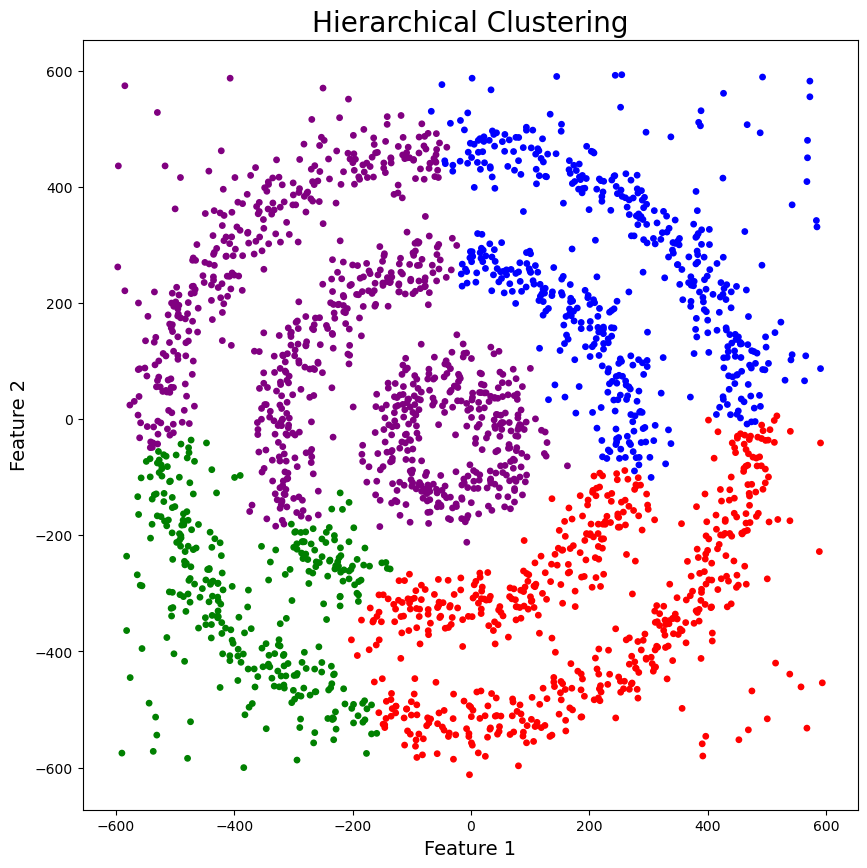

In [32]:
#Lets plot the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['Agglo_labels'],cmap = matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- In case of both hierarchical and KMeans we can see that the noise points are not captured correctly and both the models cannot make proper clusters according to the density of data points

In [35]:
#Lets now check with DBScan
df.drop('Agglo_labels',axis=1,inplace=True)
from sklearn.cluster import DBSCAN
model_2 = DBSCAN()
model_2.fit(df)

DBSCAN()

In [36]:
df['DBScan_labels']=model_2.labels_

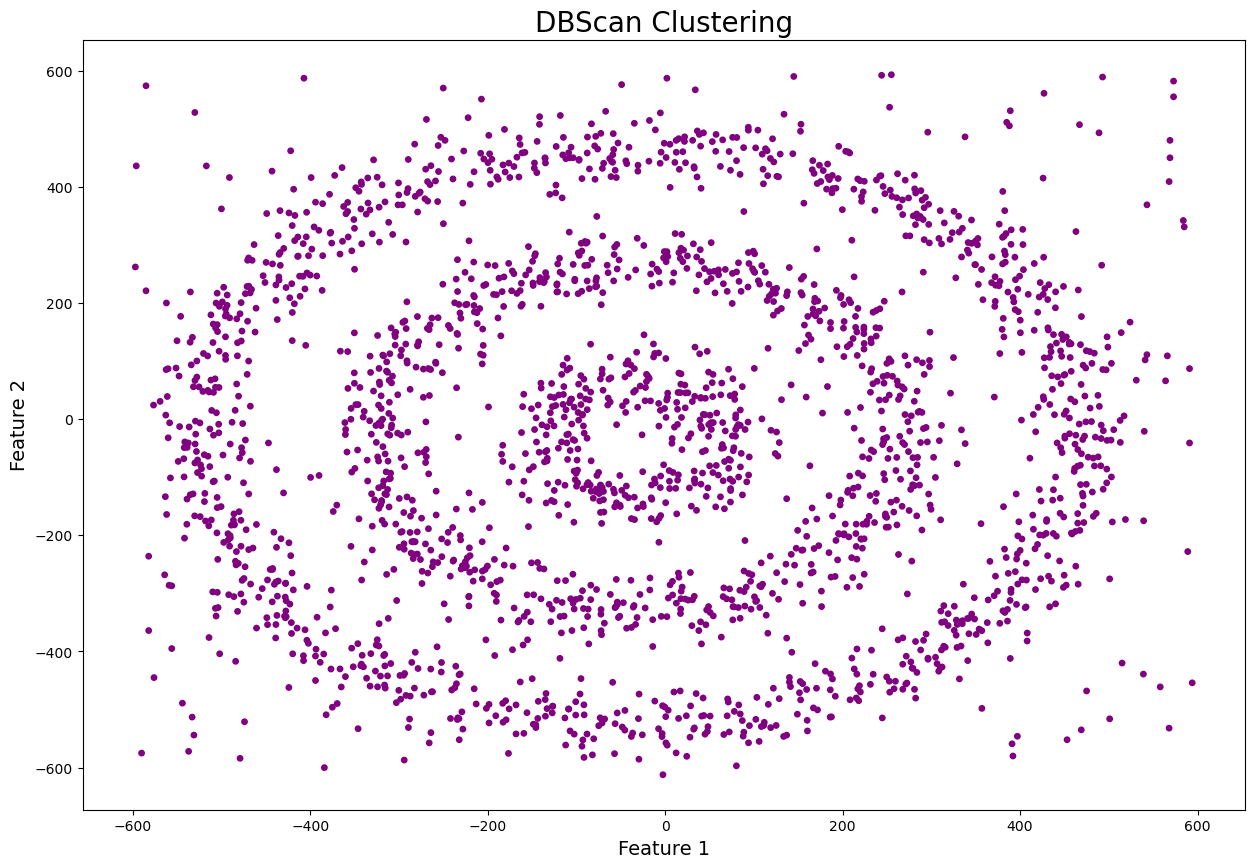

In [37]:
#plot the figure
plt.figure(figsize = (15,10))
plt.scatter(df[0],df[1],c = df['DBScan_labels'],cmap= matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBScan Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


- Here all the datapoints are being treated as noise since we have not selected appropriate epsilon value, here E = 0.5 by default

In [38]:
df.columns

Index([0, 1, 'DBScan_labels'], dtype='object')

In [39]:
# Let's now find the optimum value for the eps using K distance graph
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(df[[0,1]])
distances,indices = nbrs.kneighbors(df[[0,1]],n_neighbors=2)

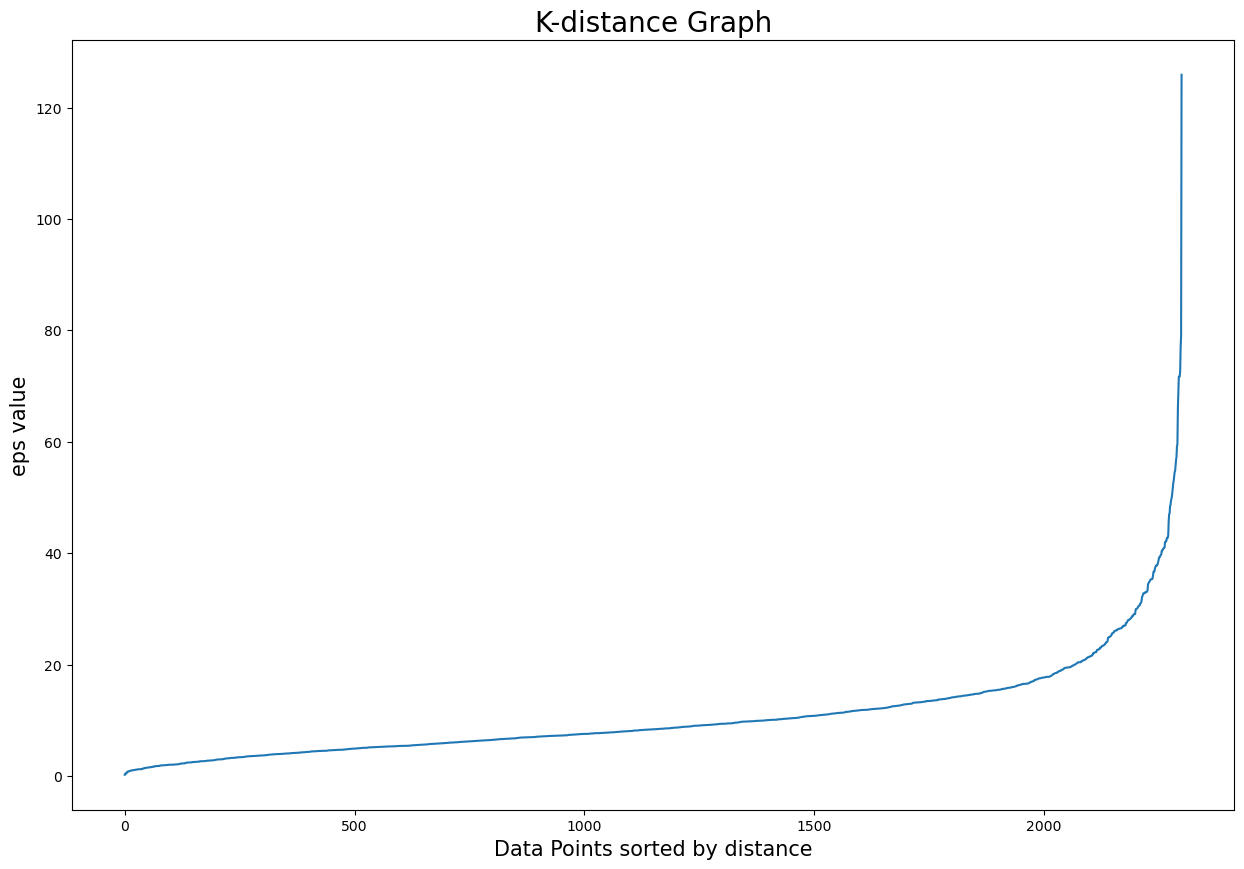

In [48]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
#plot the K distance graph
plt.figure(figsize=(15,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=15)
plt.ylabel('eps value',fontsize=15)
plt.show()

- Lets take the value of eps =30 here and minPoint=6

In [49]:
#building the final_model
Db = DBSCAN(eps=30,min_samples=6)
Db.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [50]:
df['Labels'] = Db.labels_

In [51]:
df.head()

,0,1,DBScan_labels,Labels
0,484.891555,-31.006357,-1,0
1,489.391178,21.973916,-1,0
2,462.886575,-27.599889,-1,0
3,517.218479,5.588090,-1,0
4,455.669049,1.982181,-1,0


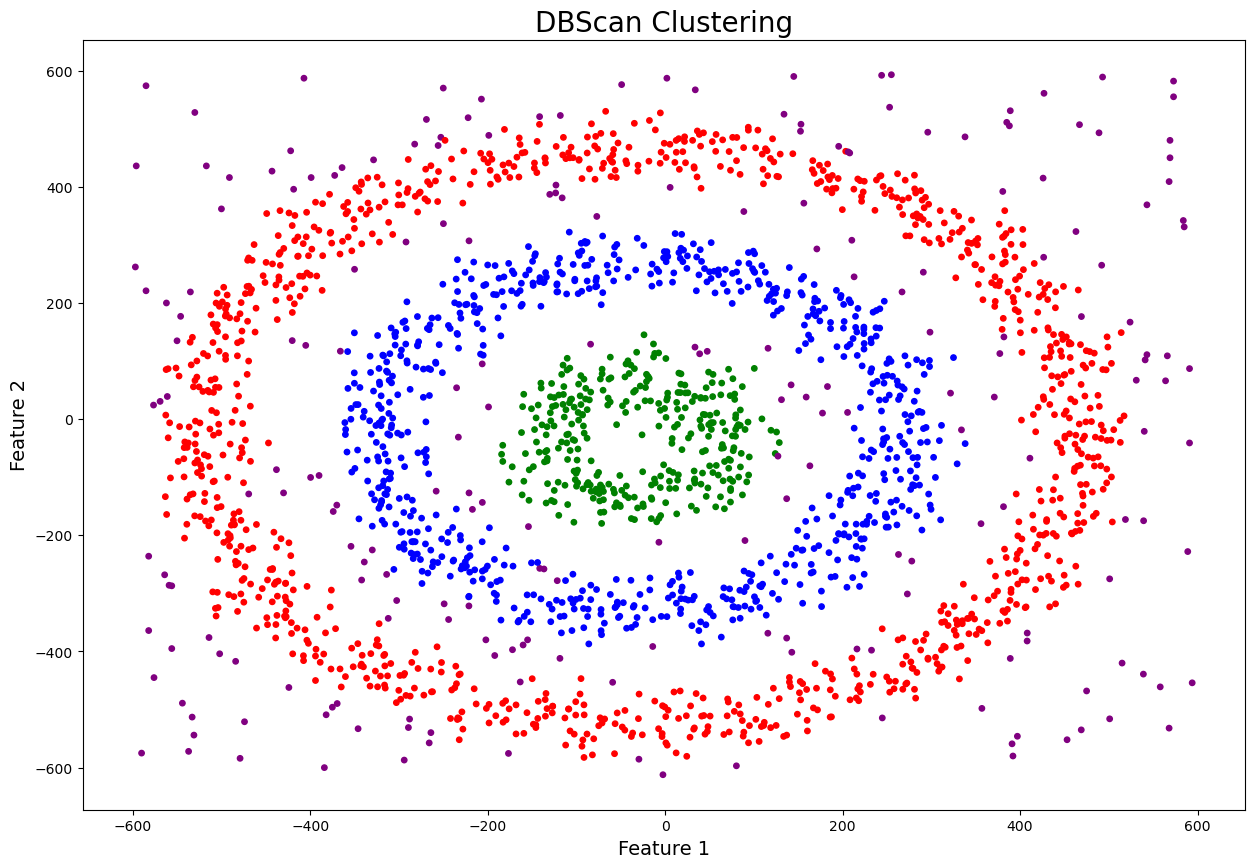

In [52]:
#plotting the graph
plt.figure(figsize=(15,10))
plt.scatter(df[0],df[1],c = df['Labels'],cmap = matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBScan Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- See how well the clusters has been made as per the densities of the cluster